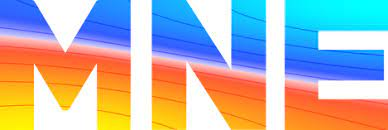

# Language and Development Lab
Loading EEG data from BrainVision using MNE Python

### Introduction

This project takes advantage of the MNE python package to analyse EEG data from BrainVision. MNE has a variety of usage options that allows easy data analysis using python. For now, this notebook demonstrates how the raw EEG data given out by BrainVision can be loaded onto MNE and visualized. This is Phase 1 for this project with the intention of demonstrating the capabilities of MNE. Phase 2 would involve processing of EEG data according to the lab specifications using ICA provided by MNE. 

### Initialization

importing all the necessary packages and accessing data files

In [36]:
import mne
mne.set_log_level('error')

import numpy as np
import matplotlib.pyplot as plt
import glob

BrainVision stores EEG files in 3 formats : .eeg, .vhdr and .vmrk

When using MNE-python, large scaled data analysis operations can be simplified by storing of all EEG data with multiple filnames and formats in one folder. This will reduce the need of accessing the data files using unique path names and simplify storage of files. The glob library from python can be used to return similar named files which should ideally be in three unique formats.

**NOTE:** *mne.set_log_level('error') is being used to avoid unecessary warnings given during compilation of the code.*

An example is shown below:



In [35]:
glob.glob('/Users/saipusuluri/Documents/EEG studies/data/R21_Experiment1_Test_SASS101_1.*')

['/Users/saipusuluri/Documents/EEG studies/data/R21_Experiment1_Test_SASS101_1.eeg',
 '/Users/saipusuluri/Documents/EEG studies/data/R21_Experiment1_Test_SASS101_1.vhdr',
 '/Users/saipusuluri/Documents/EEG studies/data/R21_Experiment1_Test_SASS101_1.vmrk']

<br> 

### Reading Raw EEG data and accessing attributes

MNE's read_raw_brainvision function always takes a .vhdr file to read raw BrainVision data from a trial. Muliple EEG files can be processed easily in the future using an iterator. We can force MNE to load in the data when we read the file, by setting the preload parameter to true in the function declaration. We will do this now to explore the data

In [28]:
raw = mne.io.read_raw_brainvision('/Users/saipusuluri/Documents/EEG studies/data/R21_Experiment1_Test_SASS101_1.vhdr', preload=True)

We now have our raw EEG data represented in Python as an MNE Raw object. We can view it’s basic information by asking for the .info property:

In [29]:
raw.info

<Info | 8 non-empty values
 bads: []
 ch_names: Fp1, Fz, F3, F7, FT9, FC5, FC1, C3, T7, TP9, CP5, CP1, Pz, P3, ...
 chs: 31 EEG
 custom_ref_applied: False
 dig: 34 items (3 Cardinal, 31 EEG)
 highpass: 0.0 Hz
 lowpass: 140.0 Hz
 meas_date: 2022-07-27 13:50:13 UTC
 nchan: 31
 projs: []
 sfreq: 500.0 Hz
>

From the above information, we understand that there are 31 EEG channels being used to record data in this test trial. 

We can get an array of channel names by using 'ch_names' as the key for .info method 

In [48]:
print('Total EEG channels: ', len(raw.info['ch_names'])) #to confirm that there are 31 EEG channels
raw.info['ch_names']

Total EEG channels:  31


['Fp1',
 'Fz',
 'F3',
 'F7',
 'FT9',
 'FC5',
 'FC1',
 'C3',
 'T7',
 'TP9',
 'CP5',
 'CP1',
 'Pz',
 'P3',
 'P7',
 'O1',
 'Oz',
 'O2',
 'P4',
 'P8',
 'TP10',
 'CP6',
 'CP2',
 'C4',
 'T8',
 'FT10',
 'FC6',
 'FC2',
 'F4',
 'F8',
 'Fp2']

Furthermore, a list of keys can be obtained using the .keys() method to access a whole variety of information that can also be individually accessed using the method shown above.

In [31]:
raw.info.keys()

dict_keys(['acq_pars', 'acq_stim', 'ctf_head_t', 'description', 'dev_ctf_t', 'dig', 'experimenter', 'utc_offset', 'device_info', 'file_id', 'highpass', 'hpi_subsystem', 'kit_system_id', 'helium_info', 'line_freq', 'lowpass', 'meas_date', 'meas_id', 'proj_id', 'proj_name', 'subject_info', 'xplotter_layout', 'gantry_angle', 'bads', 'chs', 'comps', 'events', 'hpi_meas', 'hpi_results', 'projs', 'proc_history', 'custom_ref_applied', 'sfreq', 'dev_head_t', 'ch_names', 'nchan'])

In [56]:
# to check detailed attributes of our data using MNE
# UNCOMMENT below!!!
#raw.__dict__ 

Since MNE data is contained in a NumPy array. We can access the data and understand its shape:

In [57]:
print(type(raw._data))
print(raw._data.shape)

<class 'numpy.ndarray'>
(31, 660650)


We can also obtain the length of our EEG recording using the method shown below: 

In [33]:
scan_durn = raw._data.shape[1] / raw.info['sfreq']
print('Duration of EEG recording = ', scan_durn, 's, or', scan_durn / 60, 'min.')

Duration of EEG recording =  1321.3 s, or 22.021666666666665 min.


<br>

### Plotting EEG data

We can plot individual EEG channel nodes using .plot function from matplotlib package. This can allow researchers to easily access individual EEG graphs. Below is an example to see the 'CP1' channel starting at 15 sec and ending at 16 sec. This will allow quick render of individual channels and is highly customizable.

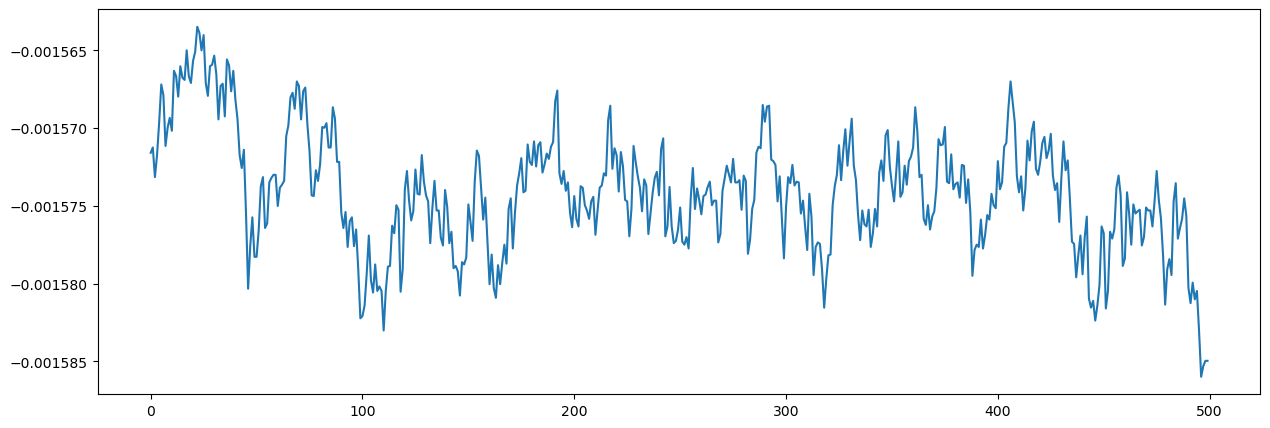

In [81]:
fig, ax = plt.subplots(figsize=[15, 5])
start_time = 15
end_time = 16

ax.plot(raw.get_data(picks='CP1', tmin=start_time, tmax=end_time).T)
plt.show()

However, to get a visual overview of all EEG channels at once, we can use the .plot method which takes a start time and a duration parameter to display the EEG data on a GUI using MNE as shown below: 

In [ ]:
raw.plot(start=15, duration=1);

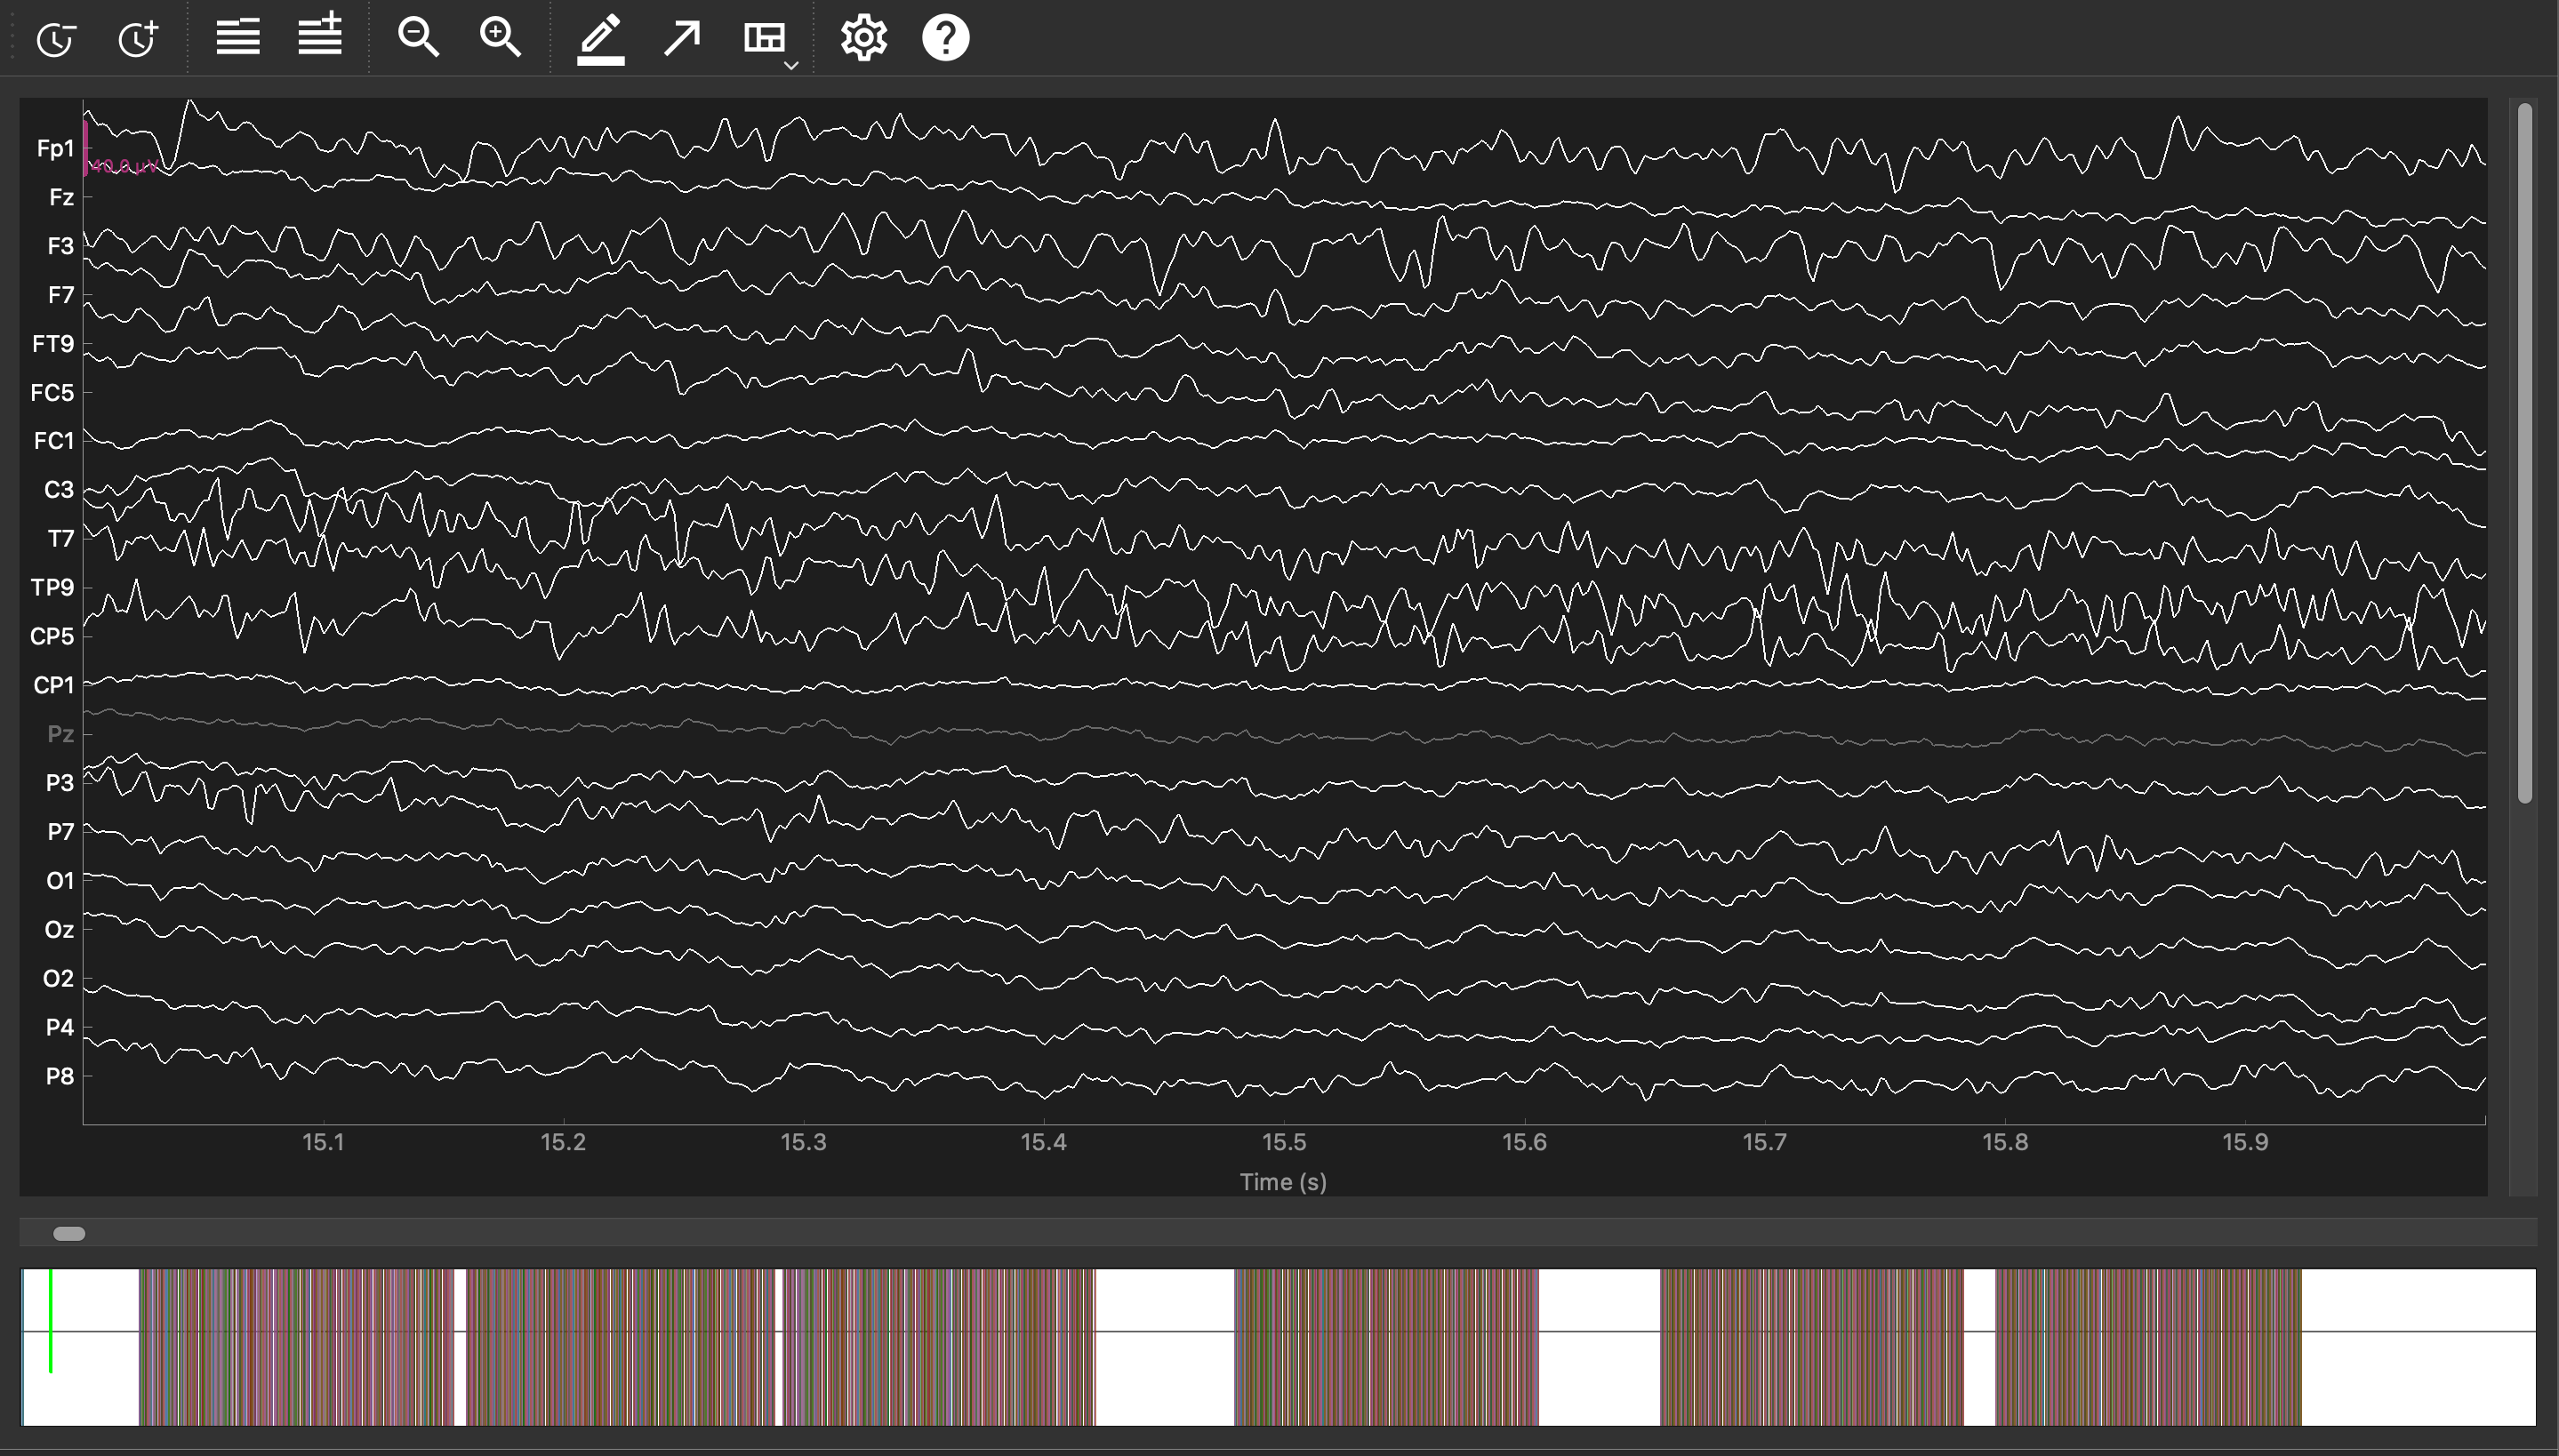

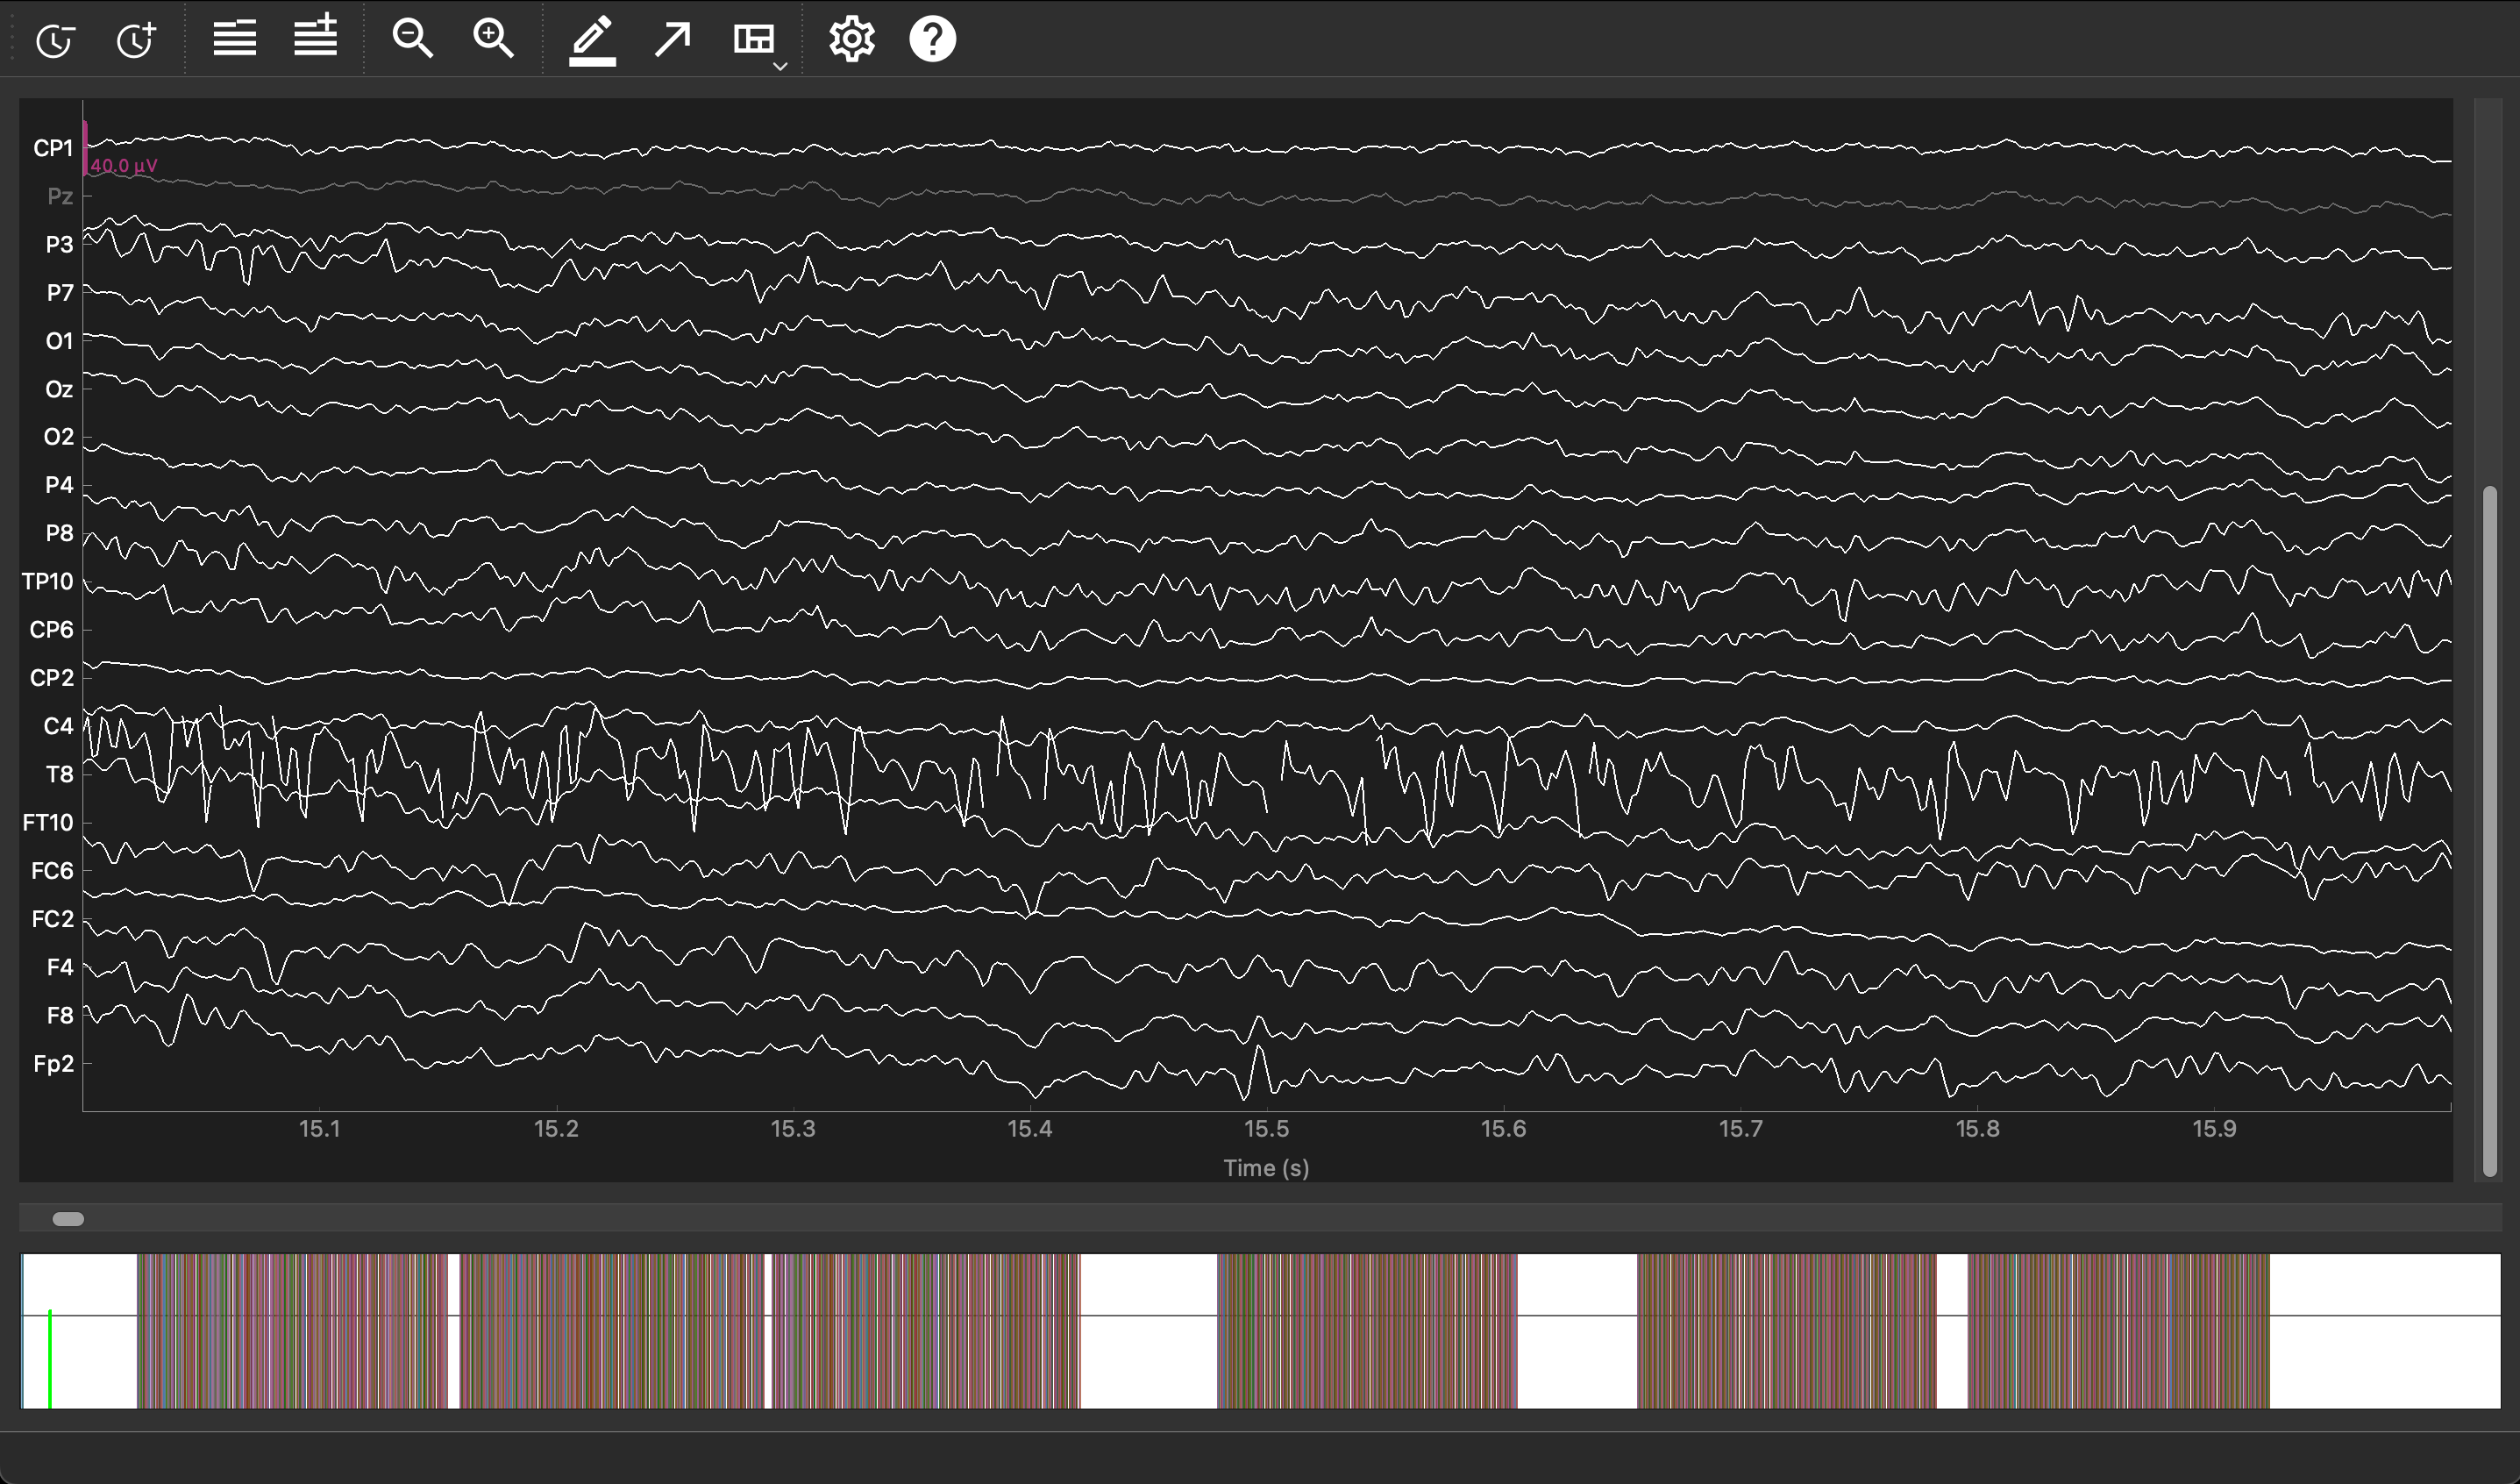

We can also get the locations of EEG channels using the 'dig' key for info of the raw data:

In [82]:
raw.info['dig']

[<DigPoint |        LPA : (-95.0, 0.0, 0.0) mm      : head frame>,
 <DigPoint |     Nasion : (0.0, 95.0, 0.0) mm       : head frame>,
 <DigPoint |        RPA : (95.0, 0.0, 0.0) mm       : head frame>,
 <DigPoint |     EEG #1 : (-29.4, 90.4, 0.0) mm     : head frame>,
 <DigPoint |     EEG #2 : (0.0, 67.2, 67.2) mm      : head frame>,
 <DigPoint |     EEG #3 : (-51.8, 63.9, 47.5) mm    : head frame>,
 <DigPoint |     EEG #4 : (-76.9, 55.8, 0.0) mm     : head frame>,
 <DigPoint |     EEG #5 : (-83.2, 27.0, -37.1) mm   : head frame>,
 <DigPoint |     EEG #6 : (-82.2, 33.2, 34.0) mm    : head frame>,
 <DigPoint |     EEG #7 : (-34.0, 35.2, 81.4) mm    : head frame>,
 <DigPoint |     EEG #8 : (-67.2, -0.0, 67.2) mm    : head frame>,
 <DigPoint |     EEG #9 : (-95.0, -0.0, 0.0) mm     : head frame>,
 <DigPoint |    EEG #10 : (-83.2, -27.0, -37.1) mm  : head frame>,
 <DigPoint |    EEG #11 : (-82.8, -31.8, 34.0) mm   : head frame>,
 <DigPoint |    EEG #12 : (-34.0, -35.2, 81.4) mm   : head fra

This can be used to visualize the EEG sensor nodes by using the plot_sensors command and displaying the names of the EEG channels

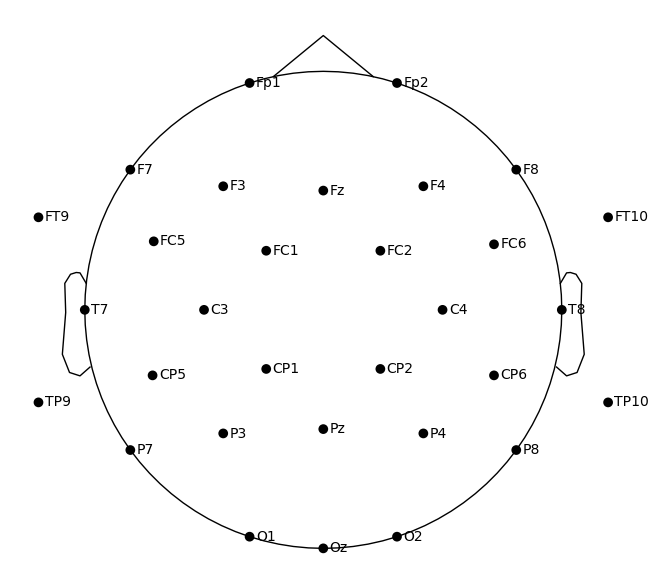

In [14]:
raw.plot_sensors(show_names=True)
plt.show()

## FURTHER SCOPE

ICA preprocessing would be a required step to clean the data and for source separation. MNE python does offer ICA preprocessing, however there are several ICA algorithms available in the MNE library for correction, removal of muscle ICA components etc. An example of ICA is shown below: 

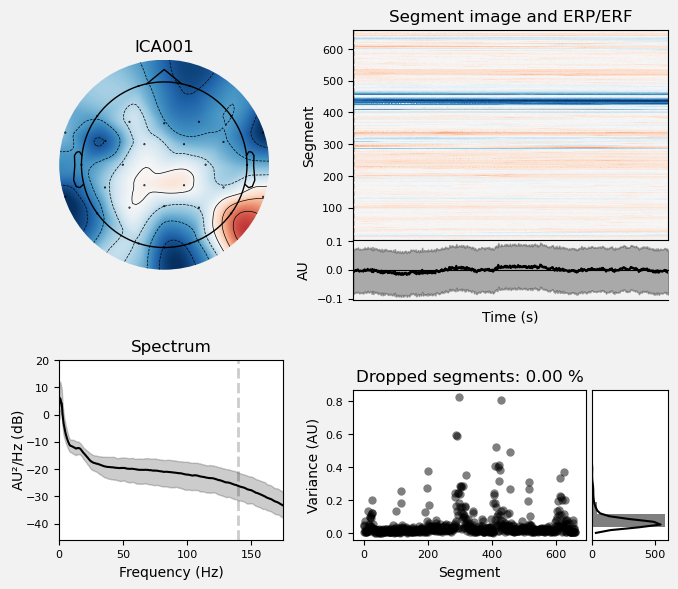

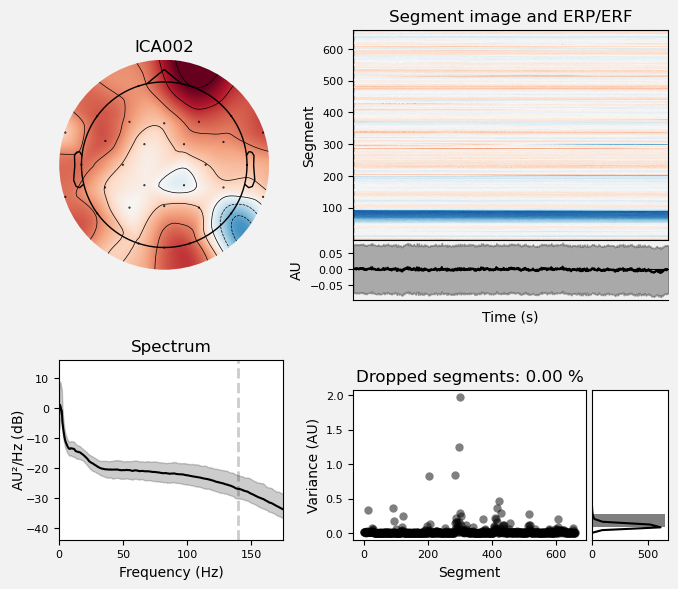

[<Figure size 700x600 with 6 Axes>, <Figure size 700x600 with 6 Axes>]

In [79]:
ica = mne.preprocessing.ICA(n_components=31, random_state=97, max_iter=800)
ica.fit(raw)
ica.exclude = [1, 2]  # details on how we picked these are omitted here
ica.plot_properties(raw, picks=ica.exclude)

The following script applies ICA to the raw EEG data to all the specified channels. 

In [83]:
orig_raw = raw.copy()
raw.load_data()
ica.apply(raw)

# show some frontal channels to clearly illustrate the artifact removal
chs = ['Fp1','Fz','F3','F7','FT9','FC5','FC1','C3','T7','TP9','CP5','CP1','Pz','P3','P7','O1','Oz','O2',
 'P4','P8','TP10','CP6','CP2','C4','T8','FT10','FC6','FC2','F4','F8','Fp2']
chan_idxs = [raw.ch_names.index(ch) for ch in chs]
orig_raw.plot(order=chan_idxs, start=15, duration=1)
raw.plot(order=chan_idxs, start=15, duration=1)